# Проект: Пространственный ИИ -- Сегментация изображения

**Набор данных**: Custom Dataset(Kubric), 5 классов:
- chair
- table
- sofa
- car
- airplane

**Модель**: YOLOv8-seg

## Распаковка датасета

Архив с данными: https://drive.google.com/file/d/14Qgw4F4a7T-9yMhyzlySSsfzw_8fv-lP/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Spatial_AI/dataset_ready_for_yolo.zip

Archive:  /content/drive/MyDrive/Spatial_AI/dataset_ready_for_yolo.zip
   creating: dataset_ready_for_yolo/
  inflating: dataset_ready_for_yolo/data.yaml  
   creating: dataset_ready_for_yolo/train/
   creating: dataset_ready_for_yolo/train/images/
  inflating: dataset_ready_for_yolo/train/images/scene_0000_000.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0000_001.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0000_002.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0000_003.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0000_004.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0001_000.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0001_001.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0001_002.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0001_003.jpg  
  inflating: dataset_ready_for_yolo/train/images/scene_0001_004.jpg  
  inflating: dataset_ready_for_yolo/train/images/sc

## Установка модели (yolo8)

In [4]:
! pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model=YOLO("yolov8n-seg.pt")

## Обучение

In [7]:
model.train(data="/content/dataset_ready_for_yolo/data.yaml",
            epochs=50,
            patience=30,
            batch=16,
            optimizer='AdamW',
            warmup_epochs=3.0,
            project='/content/project',
            name='seg_v8_stable',
            plots=True,
            val=True
            )

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_ready_for_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=seg_v8_stable, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=30, perspectiv

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78aeea2d8260>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,  

### Сохранение обученной модели

In [21]:
model.save("/content/project/seg_v8_stable/weights/model.pt")

## Демонстрация результатов

In [10]:
from IPython.display import Image

### Графики метрик для оценки процесса обучения

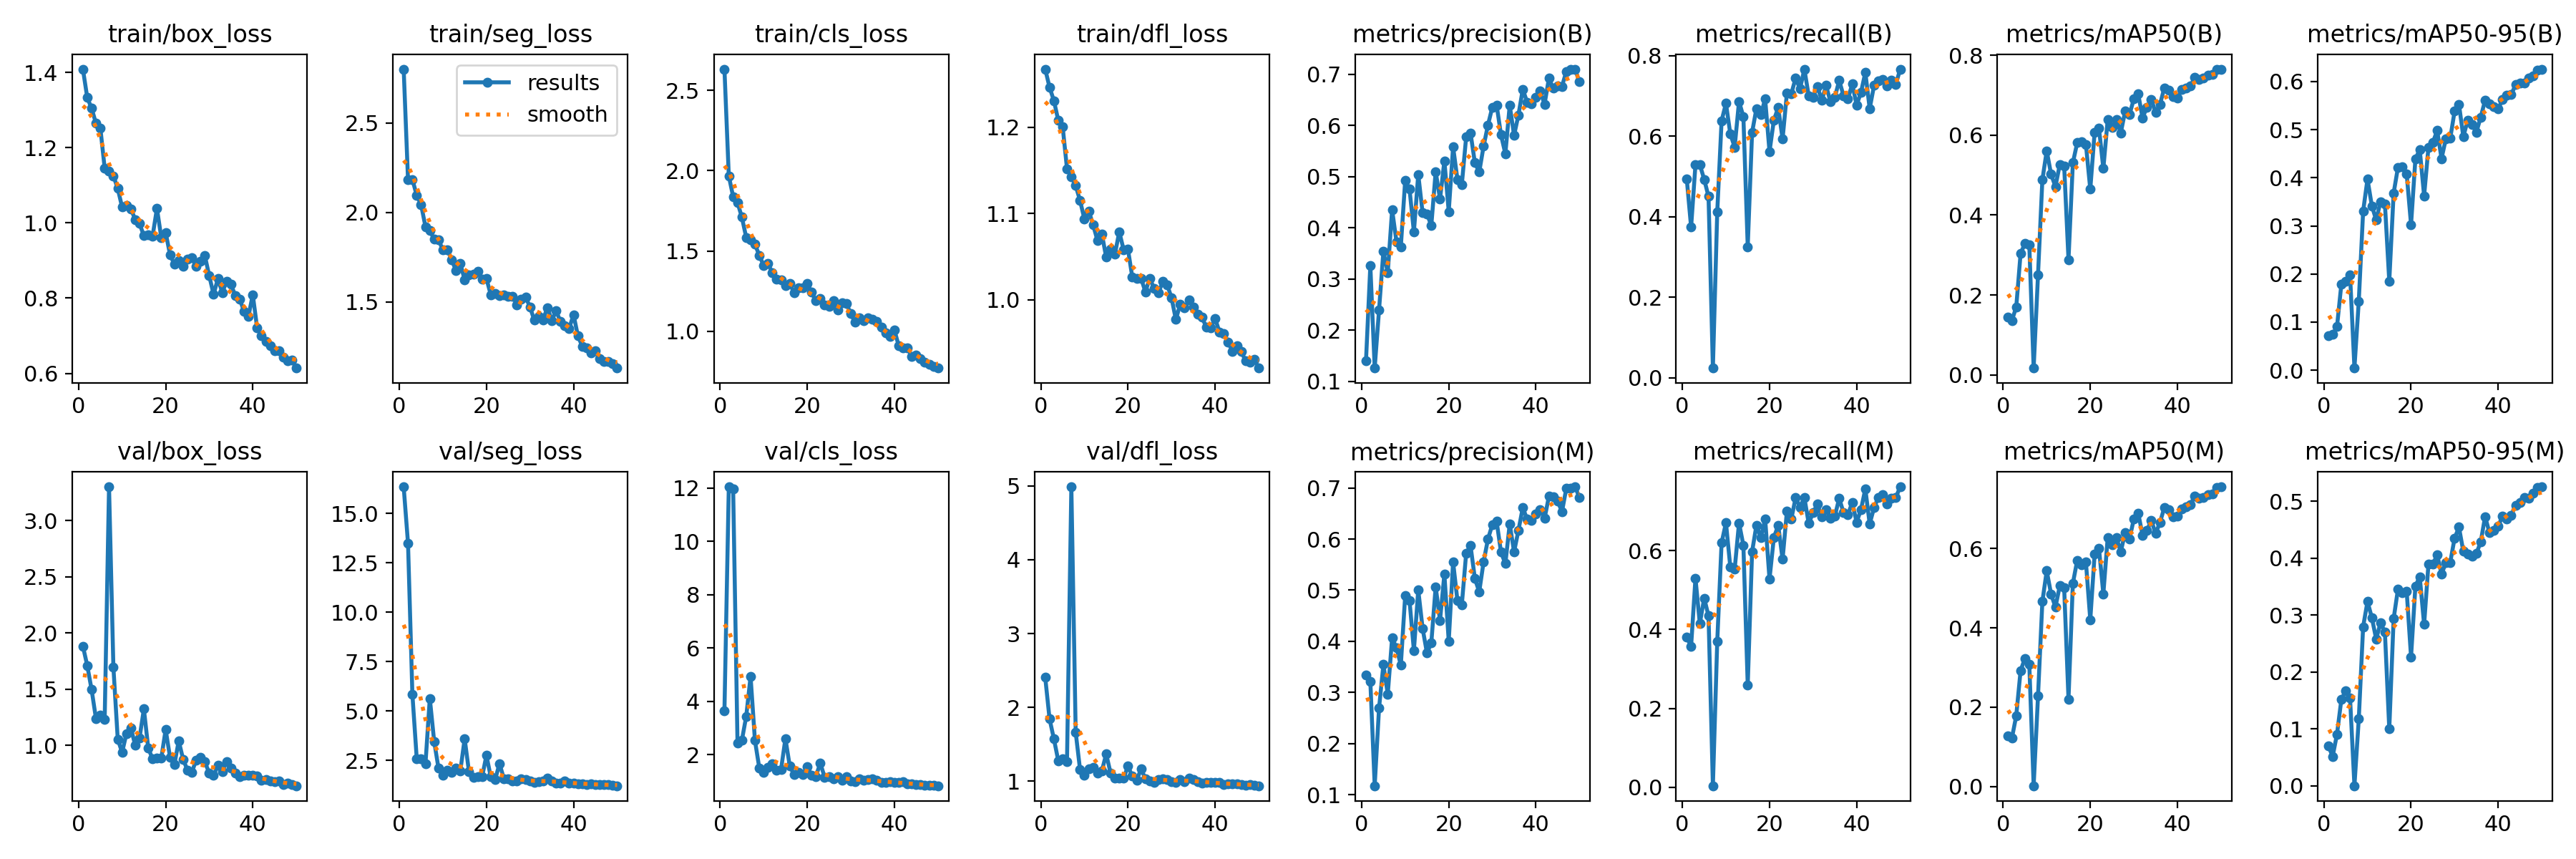

In [13]:
Image("/content/project/seg_v8_stable/results.png")

### Матрица путаницы

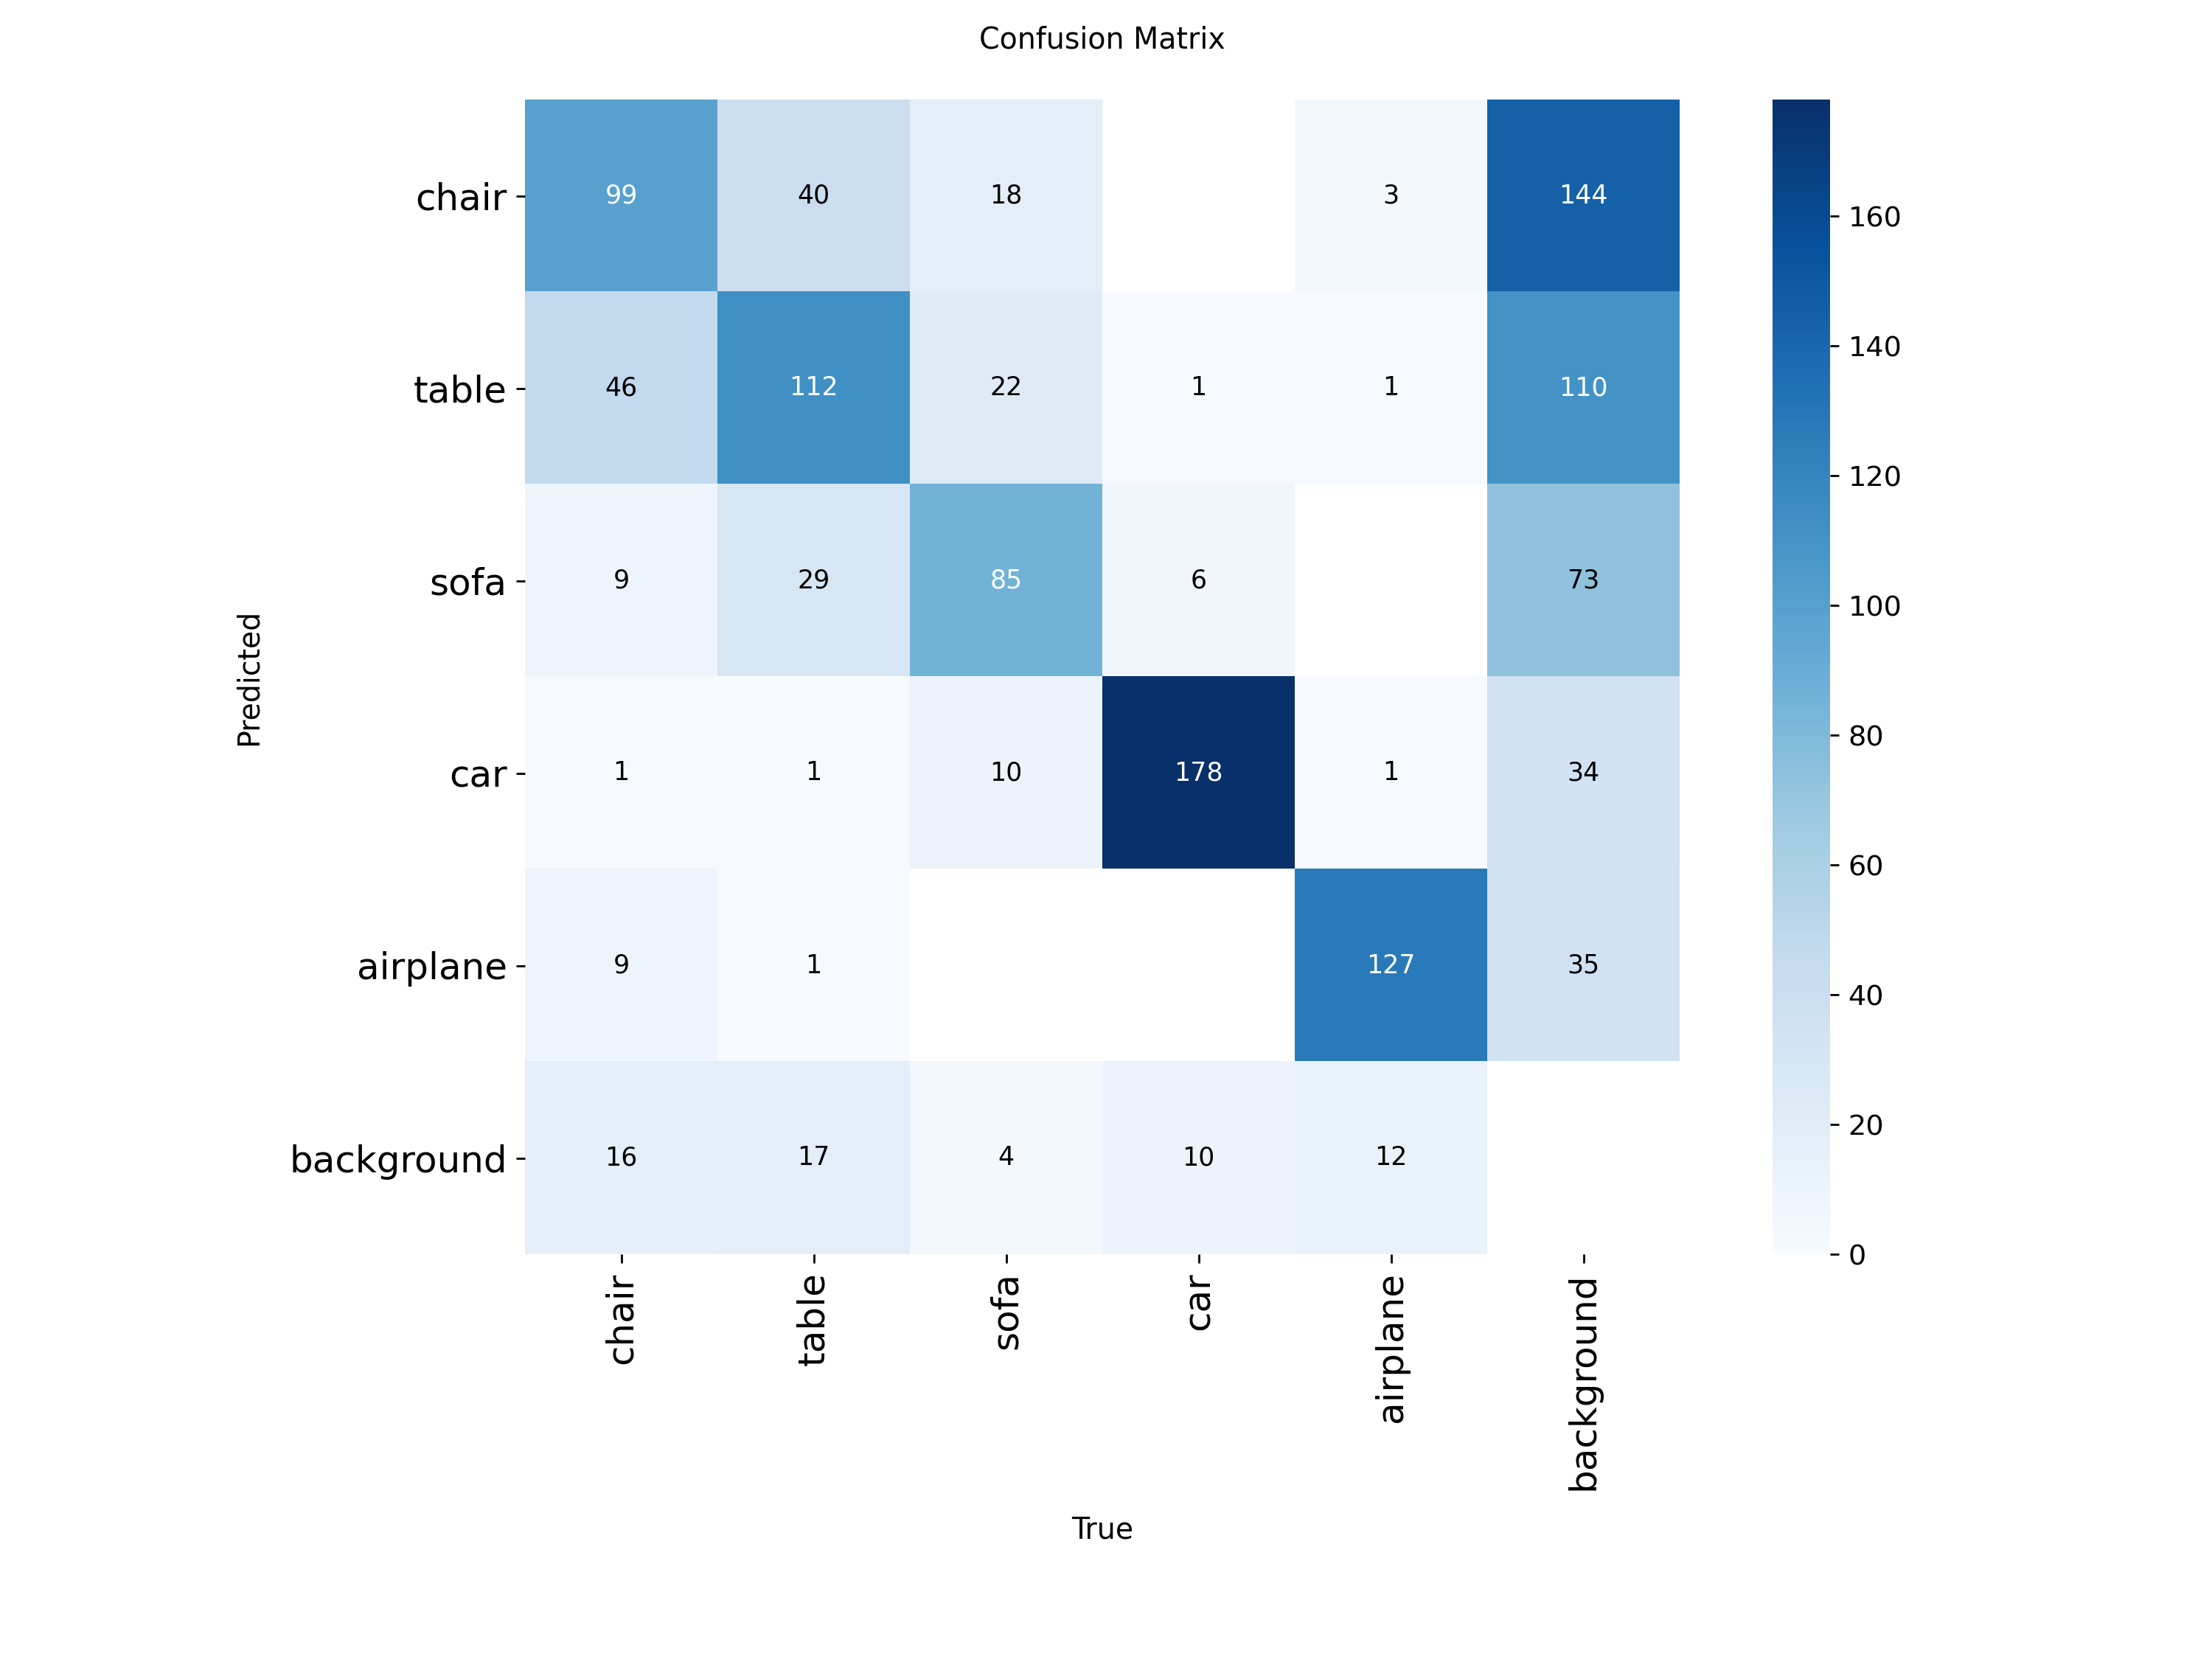

In [14]:
Image("/content/project/seg_v8_stable/confusion_matrix.png")

### Пример работы модели

#### Истинные метки объектов на изображении

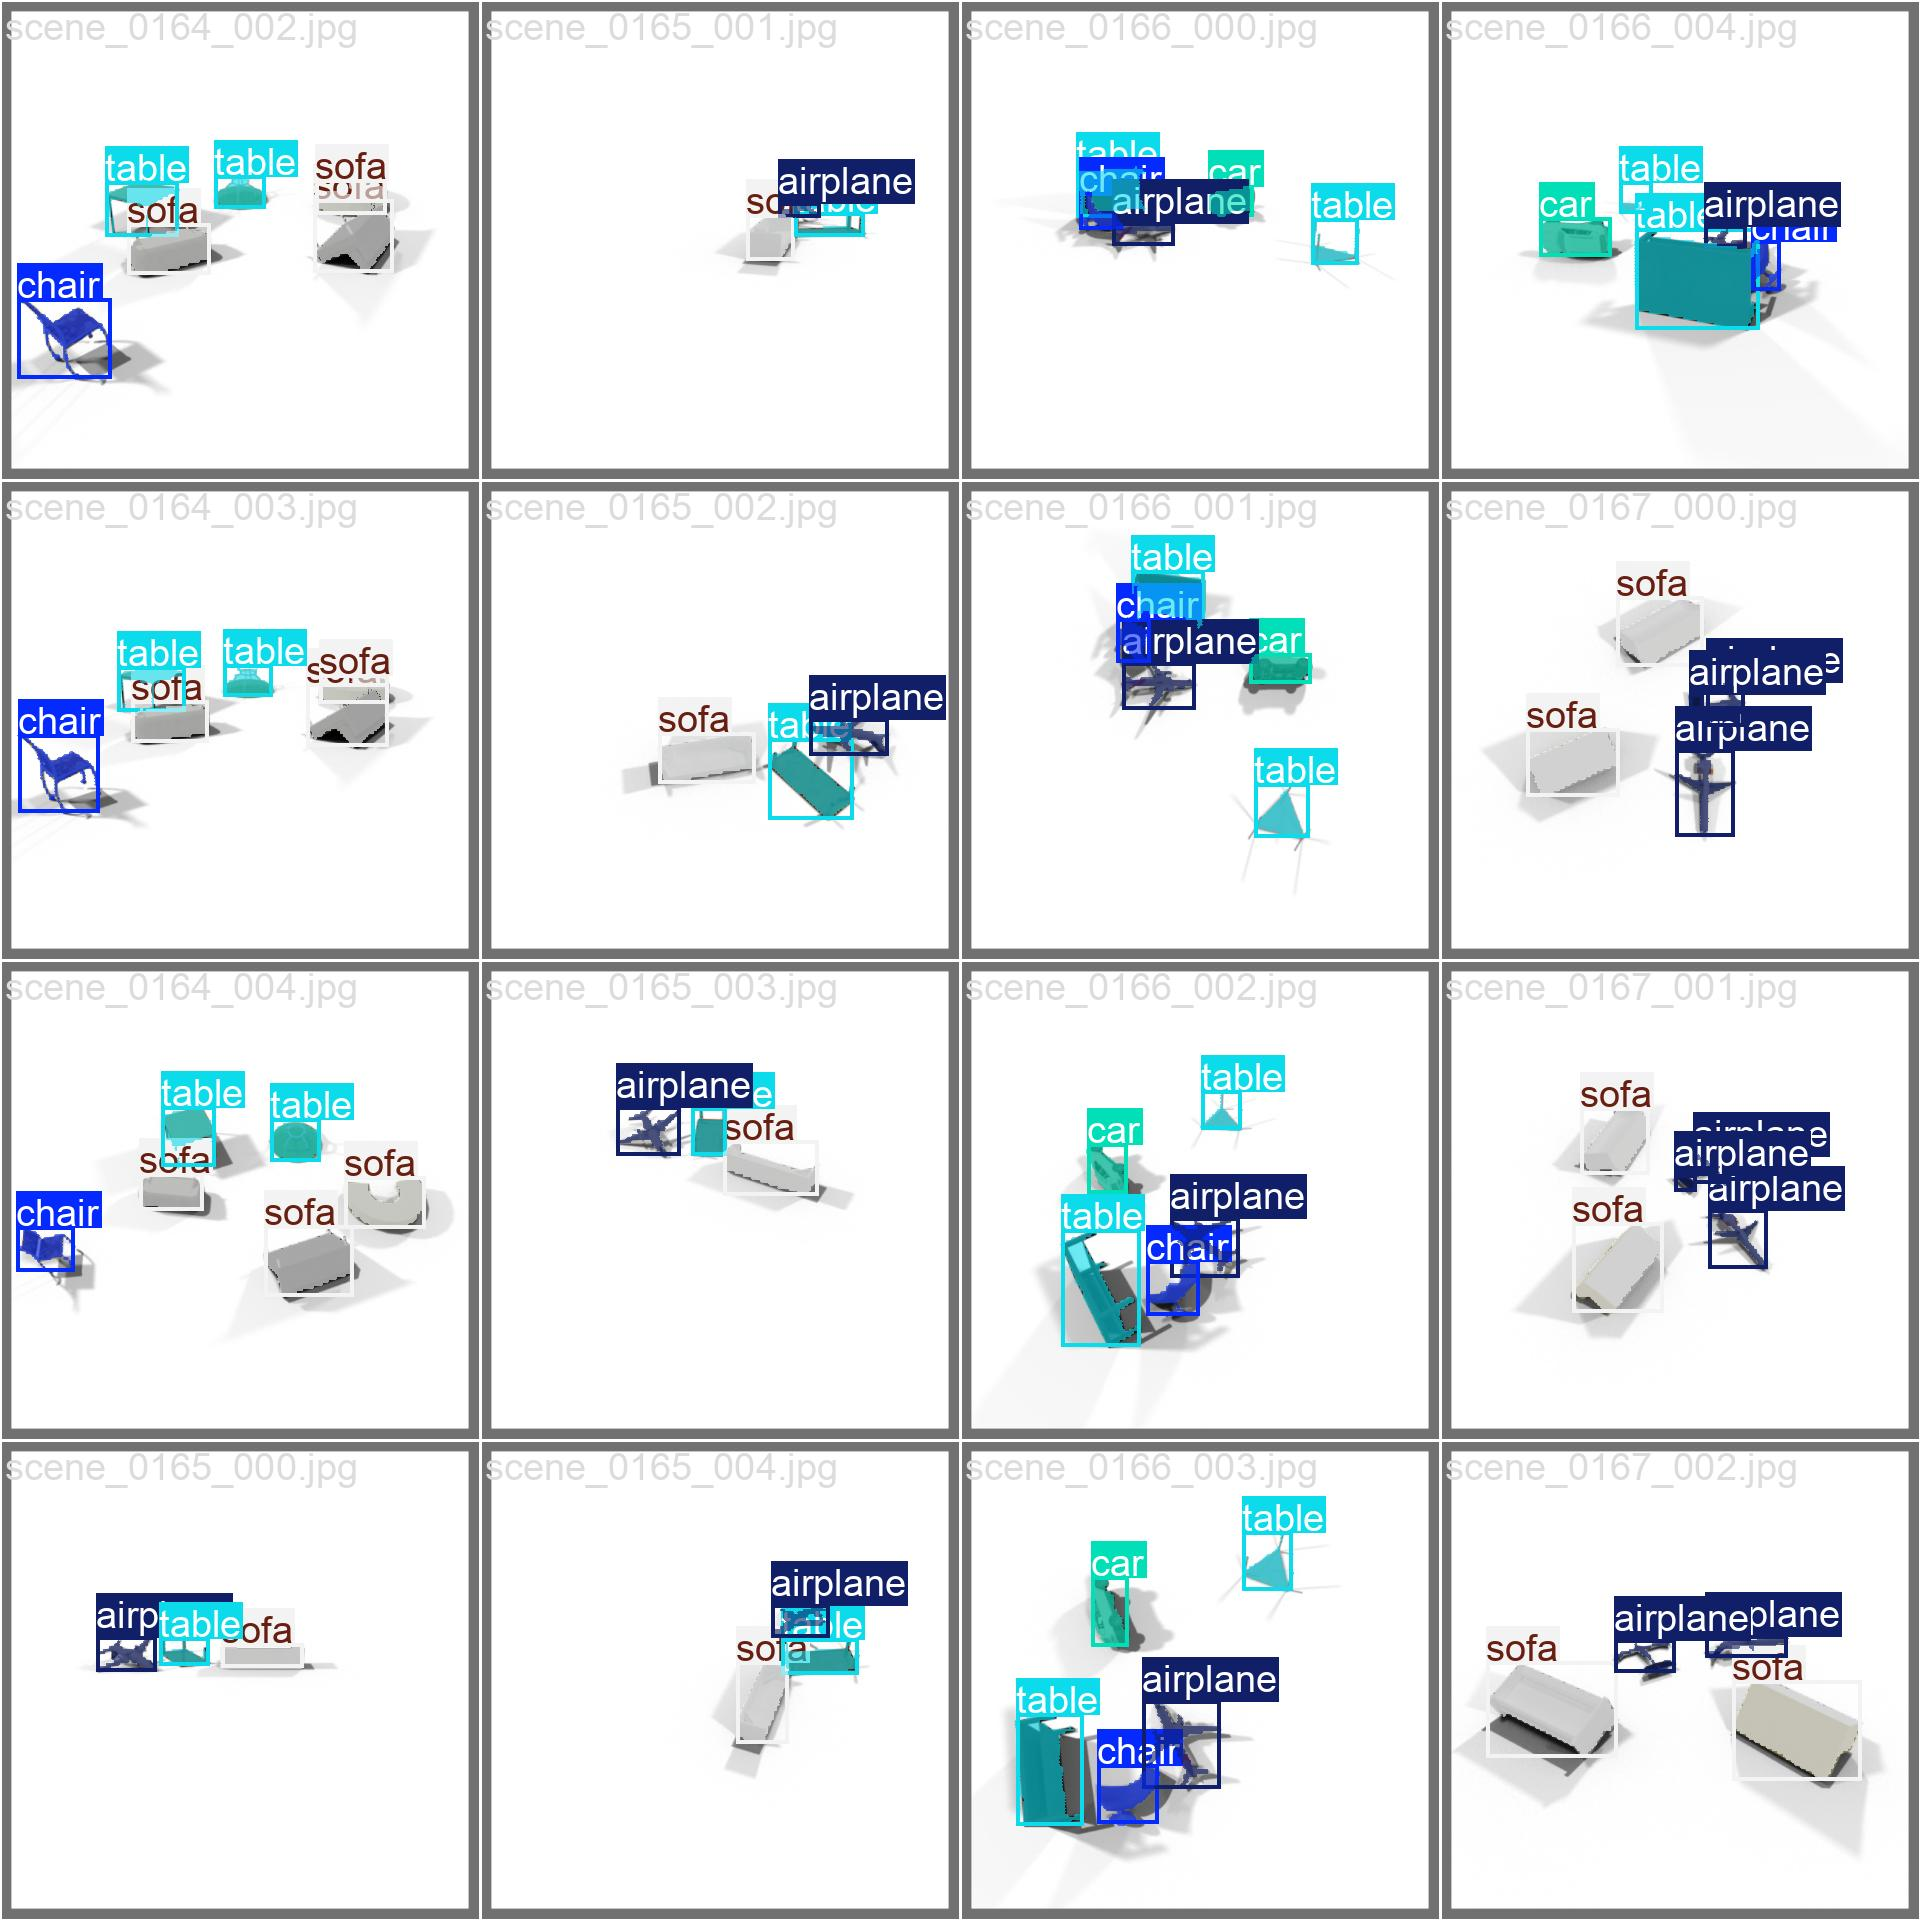

In [15]:
Image("/content/project/seg_v8_stable/val_batch1_labels.jpg")

#### Предсказанные метки объектов на изображении + уверенность принадлежности к конкретному классу


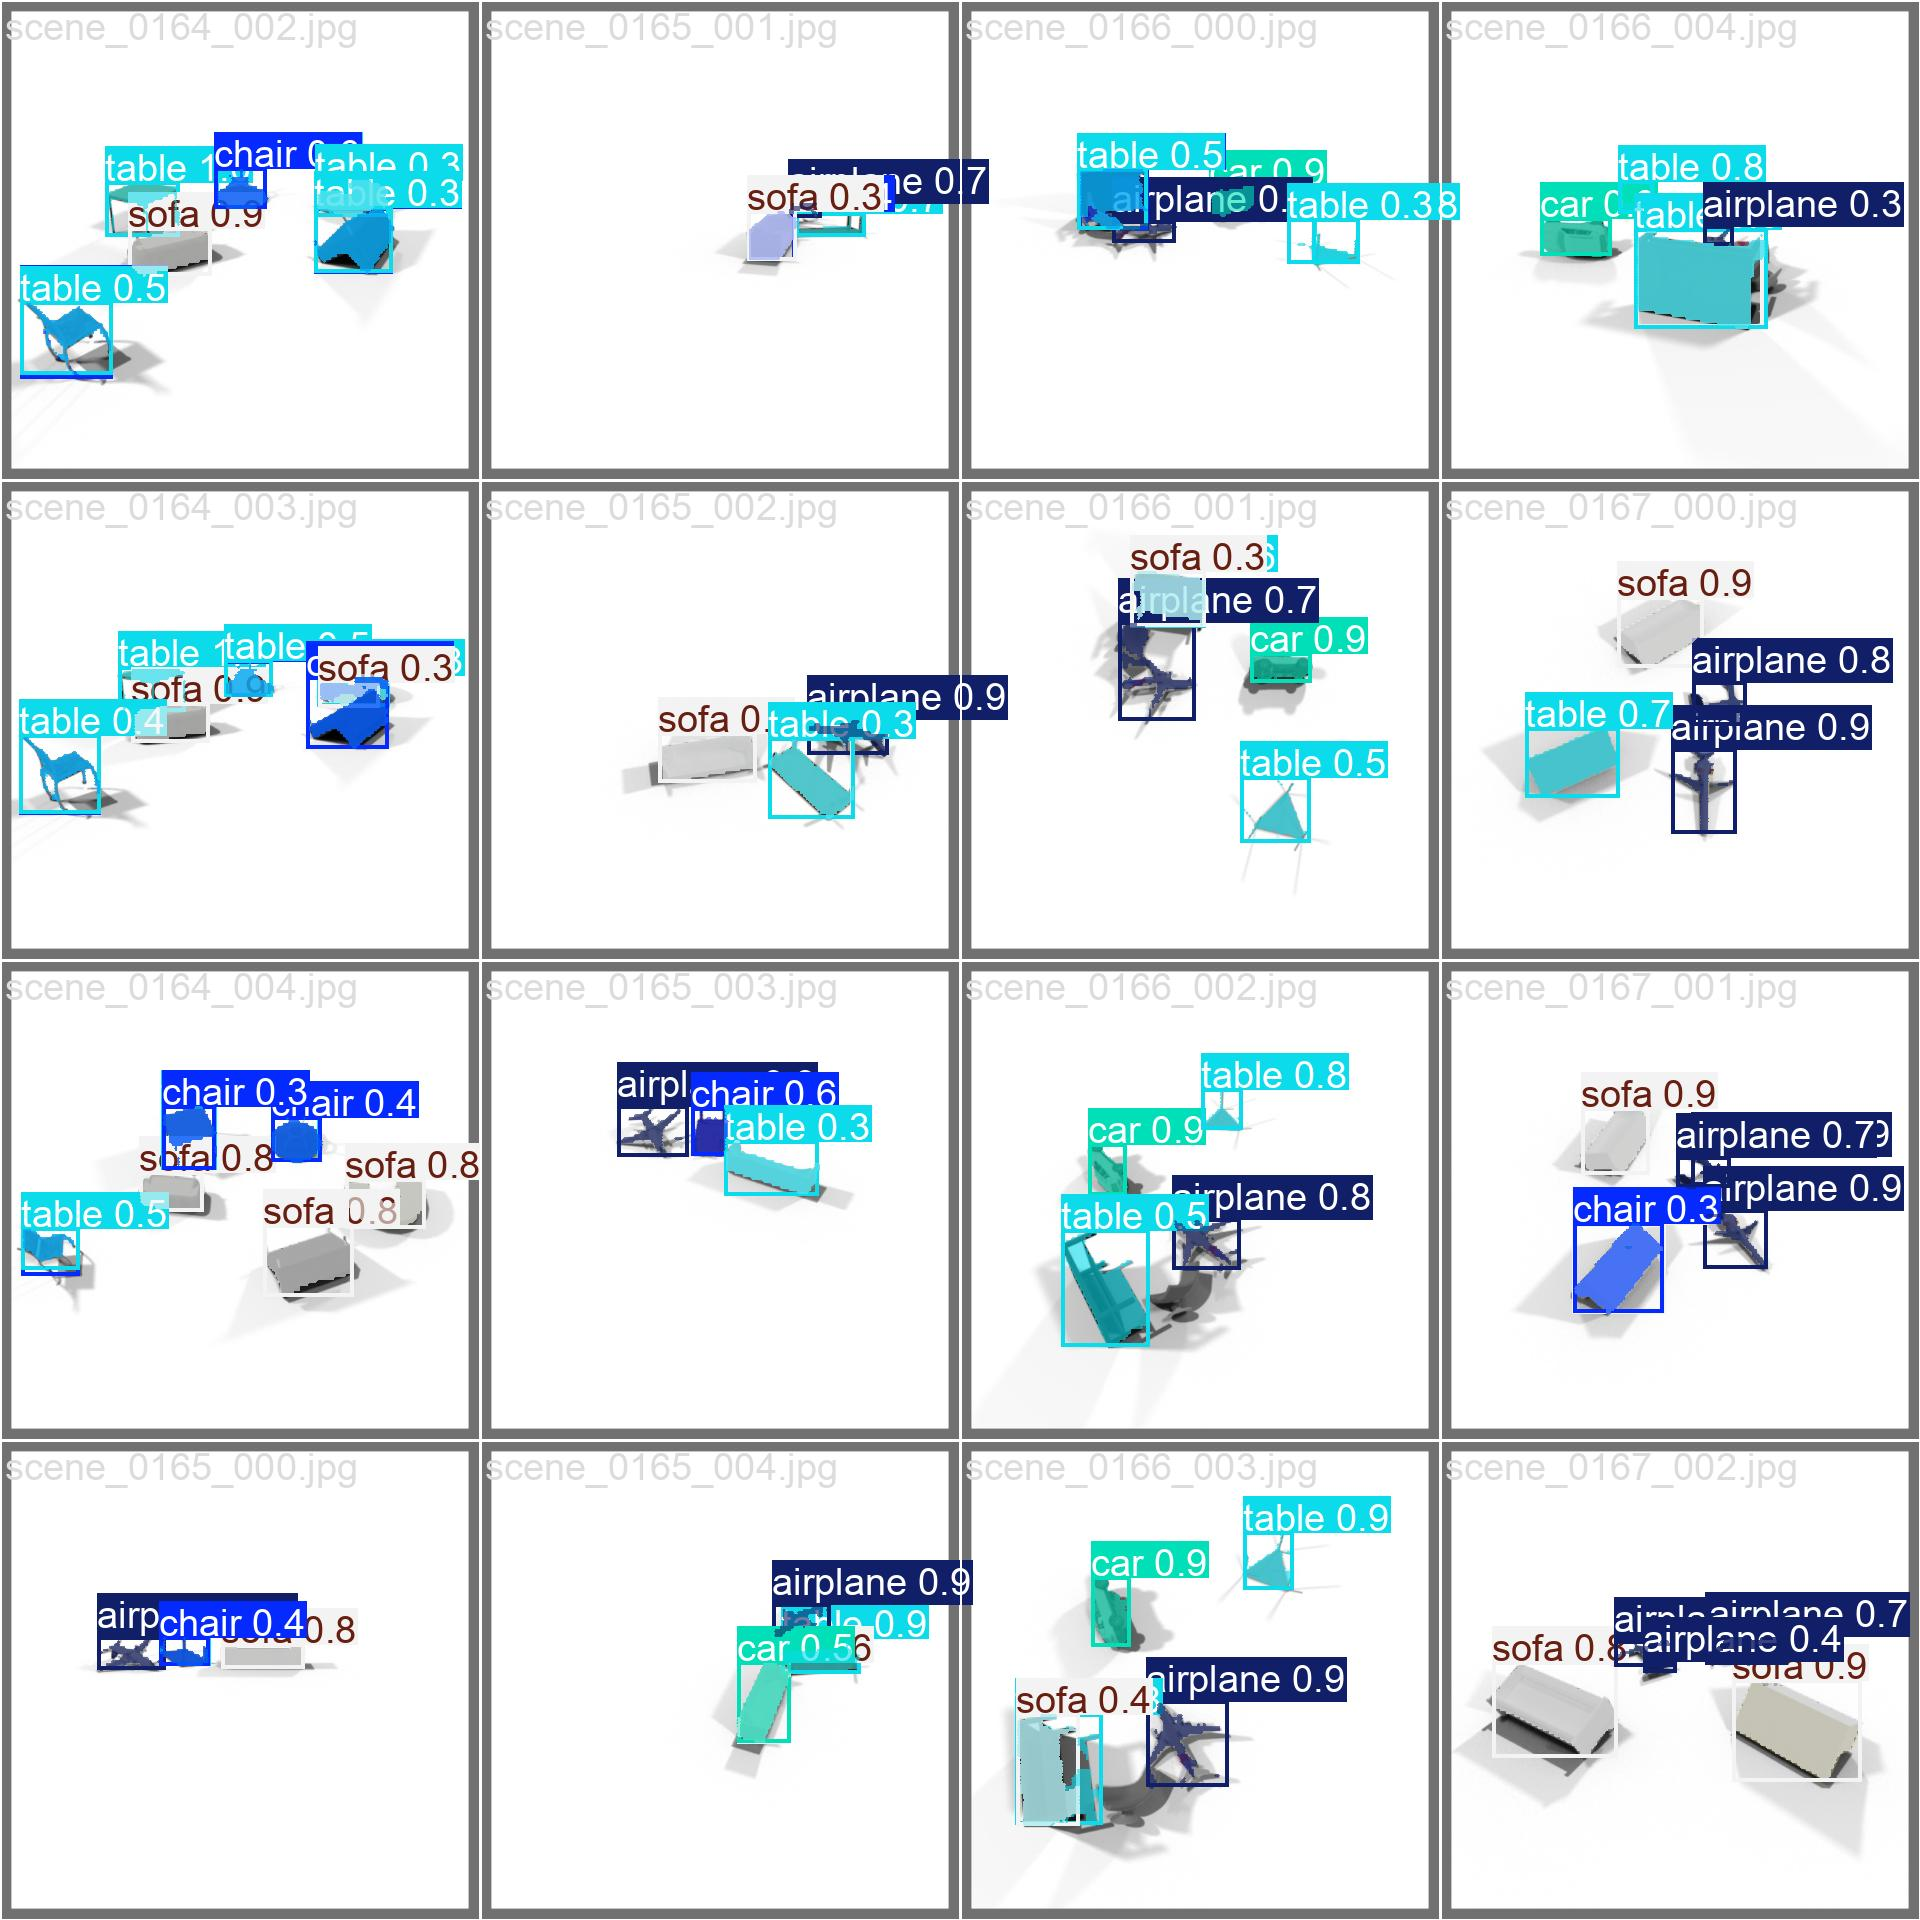

In [22]:
Image("/content/project/seg_v8_stable/val_batch1_pred.jpg")

## Экспорт модели в формат ONNX

In [29]:
model.export(
    format="onnx",
    imgsz=(640,640),
    dynamic=False,
    simplify=True,
    opset=12
)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
YOLOv8n-seg summary (fused): 85 layers, 3,259,039 parameters, 0 gradients, 11.3 GFLOPs

PyTorch: starting from '/content/project/seg_v8_stable/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 41, 8400), (1, 32, 160, 160)) (6.5 MB)

ONNX: starting export with onnx 1.19.1 opset 12...
ONNX: slimming with onnxslim 0.1.77...
ONNX: export success ✅ 1.0s, saved as '/content/project/seg_v8_stable/weights/best.onnx' (12.7 MB)

Export complete (1.5s)
Results saved to /content/project/seg_v8_stable/weights
Predict:         yolo predict task=segment model=/content/project/seg_v8_stable/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=/content/project/seg_v8_stable/weights/best.onnx imgsz=640 data=/content/dataset_ready_for_yolo/data.yaml  
Visualize:       https://netron.app


'/content/project/seg_v8_stable/weights/best.onnx'

###Тестирование восстановленной ONNX-модели

In [30]:
model = YOLO('/content/project/seg_v8_stable/weights/best.onnx', task='segment')

metrics = model.val(
    data='/content/dataset_ready_for_yolo/data.yaml',
    task='segment',
    imgsz=640,
    batch=1,
    conf=0.001,
    iou=0.7,
    device='0',
    plots=True,
    verbose=True
)

print("\nМетрики для сегментации")
print(f"mAP@50-95 (seg): {metrics.seg.map:.4f}")
print(f"mAP@50 (seg): {metrics.seg.map50:.4f}")
print(f"mAP@75 (seg): {metrics.seg.map75:.4f}")
print(f"mAP@50-95 по классам (seg): {metrics.seg.maps}")

print("\nМетрики для детекции (box)")
print(f"mAP@50-95 (box): {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.p.mean():.4f}")
print(f"Recall: {metrics.box.r.mean():.4f}")
print(f"F1: {metrics.box.f1.mean():.4f}")

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Loading /content/project/seg_v8_stable/weights/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.23.2 ('CUDAExecutionProvider', {'device_id': 0})
Setting batch=1 input of shape (1, 3, 640, 640)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 957.6±543.5 MB/s, size: 16.3 KB)
val: Scanning /content/dataset_ready_for_yolo/val/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 391.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 200/200 57.1it/s 3.5s
                   all        200        858      0.682      0.763      0.764      0.628      0.679      0.761      0.754      0.525
                 chair        134        180      0.534      0.675      0.617      0.457      0.526      0.665      0.591       0.35
                 table        130        20